In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np

I had to read the data into separate arrays in Spyder and now I can load them into here.

Fascinating! That works perfectly in Spyder but throws a missing import error in JupyterLab.

I am going to cheat and generate and save the arrays in Spyder then read them in here.

In [4]:
data = np.loadtxt('GJTest12_21.txt')
zv = data[:,0]
yv = data[:,1]
bxv = data[:,2]
byv = data[:,3]
bzv = data[:,4]

Now these are really 2D data so we shall reformat them into 2-D arrays in the mesh format needed by matplotlib. Reading the Excel file tells us that there are 29 z values and 33 y values.

In [5]:
zmesh = zv.reshape((71,75))
ymesh = yv.reshape((71,75))
bxmesh = bxv.reshape((71,75))
bymesh = byv.reshape((71,75))
bzmesh = bzv.reshape((71,75))

With them in that format we can generate 2-D plots. Let's look at By and Bz (Bx is boring).

We'll start with Bz.

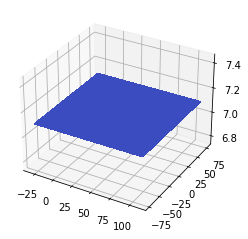

In [6]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(zmesh, ymesh, bzmesh, cmap=cm.coolwarm,linewidth=0, antialiased=False)

Then By.

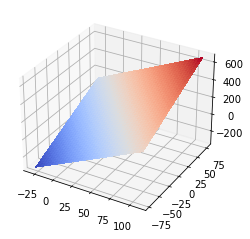

In [7]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(zmesh, ymesh, bymesh, cmap=cm.coolwarm,linewidth=0, antialiased=False)

Those look sensible.

Now our goal is to calculate $(\dfrac{\nabla{}B_{T}}{B_{z}})$ but 

a) we only have values for different y and z

b) we really hope that $B_{x}$ is essentially zero, because of symmetry.

In that case we are going for just dBy/dy and dBy/dbz, which we can approximate with simple first differences.

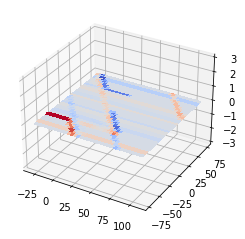

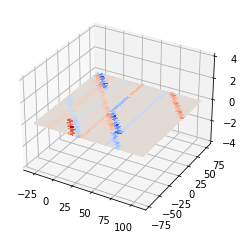

In [8]:
dy = ymesh[:,1:]-ymesh[:,:-1]
dz = zmesh[1:,:]-zmesh[:-1,:]
dbyy = bymesh[:,1:]-bymesh[:,:-1]
dbydy = dbyy / dy
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(zmesh[:,:-1], ymesh[:,:-1], dbydy, cmap=cm.coolwarm,linewidth=0, antialiased=False)
dbyz = bymesh[1:,:]-bymesh[:-1,:]
dbydz = dbyz / dz
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(zmesh[:-1,:], ymesh[:-1,:], dbydz, cmap=cm.coolwarm,linewidth=0, antialiased=False)



From that we can go to dBy/dy/Bz, and, for good measure, square the thing to get to the figure of merit. Then do the same to dBy/dz/Bz and add to get Figure of Merit.

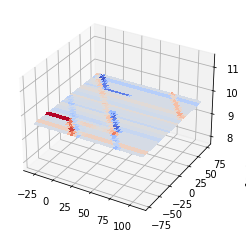

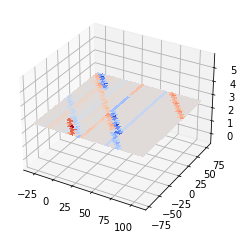

In [9]:
dbyb = dbydy / bzmesh[:,:-1]
dbybsq = dbyb * dbyb
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(zmesh[:,:-1], ymesh[:,:-1], dbybsq, cmap=cm.coolwarm,linewidth=0, antialiased=False)
dbzb = dbydz / bzmesh[:-1,:]
dbzbsq = dbzb * dbzb
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(zmesh[:-1,:], ymesh[:-1,:], dbzbsq, cmap=cm.coolwarm,linewidth=0, antialiased=False)

and I have no idea why JupyterLab has cut the $\times{}10^{-7}$ off the vertical axis.

Now sum to get the FOM. Note that we have to cut one row or col off to make the y and z diffs the same size. Then I plot the square root for visualization.

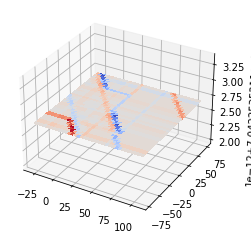

In [10]:
FOM = dbybsq[:-1,:]+dbzbsq[:,:-1]
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(zmesh[:-1,:-1], ymesh[:-1,:-1], np.sqrt(FOM), cmap=cm.coolwarm,linewidth=0, antialiased=False)

This can then be weighted by the distance from the axis

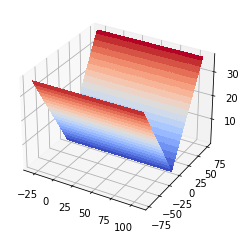

In [11]:
dist = np.abs(ymesh[:-1,:-1])
wfom = FOM * dist
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(zmesh[:-1,:-1], ymesh[:-1,:-1], wfom, cmap=cm.coolwarm,linewidth=0, antialiased=False)

Then we could extract the area of interest, if I could figure out what that is.

ASSUMING that it is the whole of the remaining data then I get

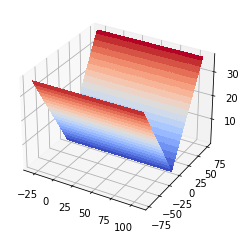

In [12]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(zmesh[:-1,:-1], ymesh[:-1,:-1], wfom, cmap=cm.coolwarm,linewidth=0, antialiased=False)

So a constant weighted by distance.

To get the full figure of merit we have to sum this and then divide by the right weight.

In [13]:
tot = np.sum(wfom)
totweight=np.sum(dist[:,:])
print(tot, np.sqrt(tot), totweight,tot/totweight, np.sqrt(tot/totweight))

95050.58520134893 308.30274926012083 191660.0 0.4959333465582226 0.704225352112676


which is the same as Gordon's.